In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# Read and Setup Data for Modeling

In [4]:
class Data():
    
    def dataAllocation(self,path, state):
        """Separate out the x_data and y_data and return each

        Args:
            path (_type_): string path for .parquet file

        Returns:
            _type_: pandas dataframe, pandas series
        """
        df = pd.read_parquet(path)
        # # Filter columns that start with 'state_code'
        # state_code_columns = df.filter(regex='^state_code', axis=1)
        #ref state
        df = df.drop(['derived_sex_Male','race_ethnicity_White', 'applicant_age_25-34', 'occupancy_type_Principal Residence'], axis=1)

        # bring data with state code 
        # filter by state_code of interst
        # then get dummies for that state
        # Drop filtered columns

        # 'derived_sex_Male', 'race_ethnicity_White, 'applicant_age_25-34', occupancy_type_Principal Residence
        df = df[df['state_code'] == state]
        df = pd.get_dummies(df, columns=['county_code'], drop_first=True)

        

        x_data = df.drop(['application_approved', 'state_code'], axis=1)

        y_data = df['application_approved']
               
        return x_data,y_data

    def trainSets(self,x_data,y_data):
        
        """Split 70% of the data into training and 30% into test sets. Call them x_train, x_test, y_train and y_test

        Args:
            x_data (_type_): pandas dataframe
            y_data (_type_): pandas dataframe

        Returns:
            _type_: pandas dataframe, pandas dataframe, pandas series, pandas series
        """
        from sklearn.model_selection import train_test_split

        # Split data
        x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=614, shuffle=True)
        #fill any nan values in y with 0
        y_train = y_train.fillna(0)

        #any nan values in X_train fill with 0
        x_train = x_train.fillna(0)

        #any nan values in X_train fill with 0
        y_test = y_test.fillna(0)

        #any nan values in X_test fill with 0
        x_test = x_test.fillna(0)


        return x_train, x_test, y_train, y_test


In [2]:
# Navigate up one level from the current directory
parent_dir = os.path.dirname(os.getcwd())

# Define the relative path to the Parquet file from the parent directory
relative_path = r"df_small_encoded.parquet"

# Concatenate the parent directory path and the relative path to get the full path
full_path = os.path.join(parent_dir, relative_path)


In [6]:
# set up data read data

datatest = Data()

# seperate target variable and features 

x_data,y_data = datatest.dataAllocation(full_path, 'NY')

# split to train and testing
x_train, x_test, y_train, y_test = datatest.trainSets(x_data,y_data)


In [7]:
len(x_train.columns)

90

# Modeling

## 1. Linear Regression

In [13]:
class LinearRegressionModel():
    
  
    def linearClassifier(self,x_train, x_test, y_train):
        """LinearRegression classifier

        Args:
            x_train (_type_): pandas series
            x_test (_type_): pandas series
            y_train (_type_): pandas series

        Returns:
            _type_: numpy array, numpy array
        """
        from sklearn.linear_model import LinearRegression

        model_lr = LinearRegression()

        model_lr.fit(x_train, y_train)

        # Make predictions
        y_predict_train = model_lr.predict(x_train)
        y_predict_test = model_lr.predict(x_test)

        # -------------------------------
        return y_predict_train, y_predict_test

    def lgTrainAccuracy(self,y_train,y_predict_train):
        """accuracy (on the training set) using the accuracy_score method.
            Round the output values greater than or equal to 0.5 to 1 and those less than 0.5 to 0. You can use any method that satisfies the requriements

        Args:
            y_train (_type_): pandas series
            y_predict_train (_type_): numpy array

        Returns:
            _type_: float
        """
        from sklearn.metrics import accuracy_score
        # Convert regression predictions to binary classification labels
        y_train_pred_class = [1 if y >= 0.5 else 0 for y in y_predict_train]

        # Calculate accuracy (not a standard approach for regression)
        train_accuracy = accuracy_score(y_train, y_train_pred_class)
       
 
        return train_accuracy
    

    def lgTestAccuracy(self,y_test,y_predict_test):
        """accuracy (on the testing set) using the accuracy_score method
            Round the output values greater than or equal to 0.5 to 1 and those less than 0.5 to 0. You can use any method that satisfies the requriements

        Args:
            y_test (_type_): pandas series
            y_predict_test (_type_): numpy array

        Returns:
            _type_: float
        """
        from sklearn.metrics import accuracy_score
        # Convert regression predictions to binary classification labels
        y_test_pred_class = [1 if y >= 0.5 else 0 for y in y_predict_test]

        # Calculate accuracy (not a standard approach for regression)
        test_accuracy = accuracy_score(y_test, y_test_pred_class)
             
        return test_accuracy
    
    def lgTestReport(self,y_test,y_predict_test):
        """Report classification

        Args:
            y_test (_type_): pandas series
            y_predict_test (_type_): numpy array

        Returns:
            _type_: float
        """
        from sklearn.metrics import classification_report

        # Convert regression predictions to binary classification labels
        y_test_pred_class = [1 if y >= 0.5 else 0 for y in y_predict_test]

        # Calculate accuracy (not a standard approach for regression)
       
        class_report = classification_report(y_test, y_test_pred_class)
       
        return class_report

In [14]:
linear = LinearRegressionModel()
y_predict_train, y_predict_test = linear.linearClassifier(x_train,x_test, y_train)
print("linearClassifier Function Executed")
print("Linear Regression Train Accuracy: ", linear.lgTrainAccuracy(y_train,y_predict_train))
print("Linear Regression Test Accuracy: ", linear.lgTestAccuracy(y_test,y_predict_test))
print("Linear Regression Test Report: \n", linear.lgTestReport(y_test,y_predict_test))

linearClassifier Function Executed
Linear Regression Train Accuracy:  0.9076667935234948
Linear Regression Test Accuracy:  0.9088070519947442
Linear Regression Test Report: 
               precision    recall  f1-score   support

           0       0.55      0.00      0.00     25269
           1       0.91      1.00      0.95    251759

    accuracy                           0.91    277028
   macro avg       0.73      0.50      0.48    277028
weighted avg       0.88      0.91      0.87    277028



## 2. Logistic Regression

In [15]:
class LogsticRegressionModel():
    
  
    def logisticClassifier(self,x_train, x_test, y_train):
        """Logistic Regression classifier

        Args:
            x_train (_type_): pandas series
            x_test (_type_): pandas series
            y_train (_type_): pandas series

        Returns:
            _type_: numpy array, numpy array
        """
        from sklearn.linear_model import LogisticRegression

        model_lgr = LogisticRegression()

        model_lgr.fit(x_train, y_train)

        # Make predictions
        y_predict_train = model_lgr.predict(x_train)
        y_predict_test = model_lgr.predict(x_test)

        # -------------------------------
        return model_lgr, y_predict_train, y_predict_test

    def lgTrainAccuracy(self,y_train,y_predict_train):
        """accuracy (on the training set) using the accuracy_score method.
            Round the output values greater than or equal to 0.5 to 1 and those less than 0.5 to 0. You can use any method that satisfies the requriements

        Args:
            y_train (_type_): pandas series
            y_predict_train (_type_): numpy array

        Returns:
            _type_: float
        """
        from sklearn.metrics import accuracy_score

        # Calculate accuracy (not a standard approach for regression)
        train_accuracy = accuracy_score(y_train, y_predict_train)
       
 
        return train_accuracy
    

    def lgTestAccuracy(self,y_test,y_predict_test):
        """accuracy (on the testing set) using the accuracy_score method
            Round the output values greater than or equal to 0.5 to 1 and those less than 0.5 to 0. You can use any method that satisfies the requriements

        Args:
            y_test (_type_): pandas series
            y_predict_test (_type_): numpy array

        Returns:
            _type_: float
        """
        from sklearn.metrics import accuracy_score
        
        # Calculate accuracy (not a standard approach for regression)
        test_accuracy = accuracy_score(y_test, y_predict_test)
       
        return test_accuracy
    
    def lgTestReport(self,y_test,y_predict_test):
        """Report classification

        Args:
            y_test (_type_): pandas series
            y_predict_test (_type_): numpy array

        Returns:
            _type_: float
        """
        from sklearn.metrics import classification_report

        # Calculate accuracy (not a standard approach for regression)
       
        class_report = classification_report(y_test, y_predict_test)
       
        return class_report

In [16]:
logistic = LogsticRegressionModel()
model_lgr, y_predict_train, y_predict_test = logistic.logisticClassifier(x_train,x_test, y_train)
print("Logistic Classifier Function Executed")
print("Logistic Regression Train Accuracy: ", logistic.lgTrainAccuracy(y_train,y_predict_train))
print("Logistic Regression Test Accuracy: ", logistic.lgTestAccuracy(y_test,y_predict_test))
print("Logistic Regression Test Report: \n", logistic.lgTestReport(y_test,y_predict_test))

Logistic Classifier Function Executed
Logistic Regression Train Accuracy:  0.994296083836893
Logistic Regression Test Accuracy:  0.9942893859104495
Logistic Regression Test Report: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     25269
           1       1.00      0.99      1.00    251759

    accuracy                           0.99    277028
   macro avg       0.97      1.00      0.98    277028
weighted avg       0.99      0.99      0.99    277028



In [17]:
# Extract coefficients and corresponding feature names
coefficients = model_lgr.coef_[0]
feature_names = x_data.columns

# Extract intercept
intercept = model_lgr.intercept_[0]


# Create a DataFrame to display coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort coefficients by absolute value to identify significant variables
#coefficients_df['Abs_Coefficient'] = abs(coefficients_df['Coefficient'])
#coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

# Add intercept to the DataFrame
intercept_row = pd.DataFrame({'Feature': 'Intercept', 'Coefficient': intercept}, index=[0])
coefficients_df_ny = pd.concat([intercept_row, coefficients_df]).reset_index(drop=True)

# Display coefficients and feature names
print(coefficients_df_ny)

              Feature  Coefficient
0           Intercept    -0.045938
1           loan_term    -0.010923
2       interest_rate    15.086975
3          income_log     0.500982
4     loan_amount_log    -0.152360
..                ...          ...
86  county_code_36119     0.005058
87  county_code_36121    -0.000603
88  county_code_36123     0.003595
89  county_code_48201     0.000005
90  county_code_53033     0.000005

[91 rows x 2 columns]


In [21]:
coefficients_df.to_csv(parent_dir+'\\coef_lgr_ny.csv', index= False)

In [18]:
# set up data read data

datatest = Data()

# seperate target variable and features 

x_data,y_data = datatest.dataAllocation(full_path, 'WA')

# split to train and testing
x_train, x_test, y_train, y_test = datatest.trainSets(x_data,y_data)

logistic = LogsticRegressionModel()
model_lgr, y_predict_train, y_predict_test = logistic.logisticClassifier(x_train,x_test, y_train)
print("Logistic Classifier Function Executed")
print("Logistic Regression Train Accuracy: ", logistic.lgTrainAccuracy(y_train,y_predict_train))
print("Logistic Regression Test Accuracy: ", logistic.lgTestAccuracy(y_test,y_predict_test))
print("Logistic Regression Test Report: \n", logistic.lgTestReport(y_test,y_predict_test))

Logistic Classifier Function Executed
Logistic Regression Train Accuracy:  0.9960373953630849
Logistic Regression Test Accuracy:  0.9959222010950494
Logistic Regression Test Report: 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97     14148
           1       1.00      1.00      1.00    204107

    accuracy                           1.00    218255
   macro avg       0.99      0.98      0.98    218255
weighted avg       1.00      1.00      1.00    218255



In [19]:
# Extract coefficients and corresponding feature names
coefficients = model_lgr.coef_[0]
feature_names = x_data.columns

# Extract intercept
intercept = model_lgr.intercept_[0]


# Create a DataFrame to display coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort coefficients by absolute value to identify significant variables
#coefficients_df['Abs_Coefficient'] = abs(coefficients_df['Coefficient'])
#coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

# Add intercept to the DataFrame
intercept_row = pd.DataFrame({'Feature': 'Intercept', 'Coefficient': intercept}, index=[0])
coefficients_df_wa = pd.concat([intercept_row, coefficients_df]).reset_index(drop=True)

# Display coefficients and feature names
print(coefficients_df_wa)

              Feature  Coefficient
0           Intercept     0.055228
1           loan_term     0.005977
2       interest_rate    15.425340
3          income_log     0.520557
4     loan_amount_log    -1.897550
..                ...          ...
61  county_code_53069    -0.002800
62  county_code_53071    -0.009091
63  county_code_53073     0.015699
64  county_code_53075    -0.005757
65  county_code_53077     0.011805

[66 rows x 2 columns]


In [20]:
# set up data read data

datatest = Data()

# seperate target variable and features 

x_data,y_data = datatest.dataAllocation(full_path, 'TX')

# split to train and testing
x_train, x_test, y_train, y_test = datatest.trainSets(x_data,y_data)

logistic = LogsticRegressionModel()
model_lgr, y_predict_train, y_predict_test = logistic.logisticClassifier(x_train,x_test, y_train)
print("Logistic Classifier Function Executed")
print("Logistic Regression Train Accuracy: ", logistic.lgTrainAccuracy(y_train,y_predict_train))
print("Logistic Regression Test Accuracy: ", logistic.lgTestAccuracy(y_test,y_predict_test))
print("Logistic Regression Test Report: \n", logistic.lgTestReport(y_test,y_predict_test))

c:\Users\ForceNature\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Classifier Function Executed
Logistic Regression Train Accuracy:  0.9963501118822928
Logistic Regression Test Accuracy:  0.996442746450897
Logistic Regression Test Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99    102827
           1       1.00      1.00      1.00    725340

    accuracy                           1.00    828167
   macro avg       0.99      0.99      0.99    828167
weighted avg       1.00      1.00      1.00    828167



In [21]:
# Extract coefficients and corresponding feature names
coefficients = model_lgr.coef_[0]
feature_names = x_data.columns

# Extract intercept
intercept = model_lgr.intercept_[0]


# Create a DataFrame to display coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort coefficients by absolute value to identify significant variables
#coefficients_df['Abs_Coefficient'] = abs(coefficients_df['Coefficient'])
#coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

# Add intercept to the DataFrame
intercept_row = pd.DataFrame({'Feature': 'Intercept', 'Coefficient': intercept}, index=[0])
coefficients_df_tx = pd.concat([intercept_row, coefficients_df]).reset_index(drop=True)

# Display coefficients and feature names
print(coefficients_df_tx)

               Feature  Coefficient
0            Intercept    -0.036055
1            loan_term     0.000173
2        interest_rate    16.222707
3           income_log     0.314023
4      loan_amount_log    -1.686258
..                 ...          ...
276  county_code_48499    -0.004492
277  county_code_48501    -0.001766
278  county_code_48503    -0.001445
279  county_code_48505    -0.000131
280  county_code_48507    -0.001526

[281 rows x 2 columns]


In [22]:
coefficients_df_ny['state'] = 'NY'
coefficients_df_wa['state'] = 'WA'
coefficients_df_tx['state'] = 'TX'


In [23]:
# Concatenate along rows
concatenated_df = pd.concat([coefficients_df_ny, coefficients_df_wa, coefficients_df_tx], axis=0)

# If you want to reset the index after concatenation
concatenated_df.reset_index(drop=True, inplace=True)

In [24]:
concatenated_df.to_csv(parent_dir+'\\coef_lgr_agg.csv', index= False)

## Random Forest

In [8]:
class RFClassifier():
    
    # points [2]
    def randomForestClassifier(self,x_train,x_test, y_train):
        """RandomForestClassifie

        Args:
            x_train (_type_): pandas dataframe
            x_test (_type_): pandas dataframe
            y_train (_type_): pandas series

        Returns:
            _type_: RandomForestClassifier object, numpy array, numpy array
        """
        from sklearn.ensemble import RandomForestClassifier

        # Initialize the Random Forest model
        rf_clf = RandomForestClassifier(random_state=614)

        # Train the model on the training data
        rf_clf.fit(x_train, y_train)

        # Make predictions on the testing data
        y_predict_train = rf_clf.predict(x_train)

        y_predict_test = rf_clf.predict(x_test)
        
        return rf_clf,y_predict_train, y_predict_test
    

    def rfTrainAccuracy(self,y_train,y_predict_train):
        """Return accuracy on the training set using the accuracy_score method

        Args:
            y_train (_type_): pandas series
            y_predict_train (_type_): numpy array

        Returns:
            _type_: float
        """
        from sklearn.metrics import accuracy_score

        # Calculate accuracy on the training set
        train_accuracy = accuracy_score(y_train, y_predict_train)
        
        # -------------------------------
        return train_accuracy
    

    def rfTestAccuracy(self,y_test,y_predict_test):
        """Return accuracy on the test set using the accuracy_score method.

        Args:
            y_test (_type_): pandas series
            y_predict_test (_type_): numpy array

        Returns:
            _type_: float
        """
        from sklearn.metrics import accuracy_score
        # Calculate accuracy on the training set
        test_accuracy = accuracy_score(y_test, y_predict_test)


        return test_accuracy


    def rfFeatureImportance(self,rf_clf):
        """Determine the feature importance as evaluated by the Random Forest Classifier

        Args:
            rf_clf (_type_): RandomForestClassifier object

        Returns:
            _type_: float array
        """

        # Get feature importances
        feature_importance = rf_clf.feature_importances_
        
        # -------------------------------
        return feature_importance
    
    # points [1]
    def sortedRFFeatureImportanceIndicies(self,rf_clf):
        """Sorted by descending order and return the feature numbers[0 to ...]

        Args:
            rf_clf (_type_): RandomForestClassifier object

        Returns:
            _type_: int array
        """
        # Get feature importances
        feature_importance = rf_clf.feature_importances_

        # Sort feature importances in descending order
        sorted_indices = feature_importance.argsort()[::-1]
       
        return sorted_indices
    
    def hyperParameterTuning(self,rf_clf,x_train,y_train):
        """Tune the hyper-parameters 'n_estimators' and 'max_depth'

        Args:
            rf_clf (_type_): RandomForestClassifier object
            x_train (_type_): pandas dataframe
            y_train (_type_): pandas series

        Returns:
            _type_: GridSearchCV object
        """
        # param_grid for GridSearchCV as a dictionary

        param_grid = {
            'n_estimators': [4, 16, 256],
            'max_depth': [2, 8, 16]
        }
        from sklearn.model_selection import GridSearchCV

        # Create GridSearchCV object
        gscv_rfc = GridSearchCV(estimator=rf_clf, param_grid=param_grid)

        # Fit the GridSearchCV object to the training data
        gscv_rfc.fit(x_train, y_train)
        
        # -------------------------------
        return gscv_rfc
    
    # points [1]
    def bestParams(self,gscv_rfc):
        """best params, using .best_params_

        Args:
            gscv_rfc (_type_): GridSearchCV object

        Returns:
            _type_: parameter dict
        """
        best_params = gscv_rfc.best_params_

        return best_params
    
    # points [1]
    def bestScore(self,gscv_rfc):
        """Get the best score, using .best_score_.

        Args:
            gscv_rfc (_type_): GridSearchCV object

        Returns:
            _type_: float
        """
        best_score = gscv_rfc.best_score_
       
        return best_score
    
    def rfTestReport(self,y_test,y_predict_test):
        """Report classification

        Args:
            y_test (_type_): pandas series
            y_predict_test (_type_): numpy array

        Returns:
            _type_: float
        """
        from sklearn.metrics import classification_report

        # Calculate accuracy (not a standard approach for regression)
       
        class_report = classification_report(y_test, y_predict_test)
       
        return class_report

In [9]:
rf = RFClassifier()
rf_clf,y_predict_train, y_predict_test = rf.randomForestClassifier(x_train,x_test, y_train)
print("randomForestClassifier Function Executed")
print("Random Forest Train Accuracy: ",rf.rfTrainAccuracy(y_train,y_predict_train))
print("Random Forest Test Accuracy: ",rf.rfTestAccuracy(y_test,y_predict_test))
print("Random Forest Feature Importance: ",rf.rfFeatureImportance(rf_clf))
print("Random Forest Sorted Feature Importance: ",rf.sortedRFFeatureImportanceIndicies(rf_clf))
gscv_rfc = rf.hyperParameterTuning(rf_clf,x_train,y_train)
print("HyperParameterTuning Function Executed")
print("Random Forest Best Parameters: ",rf.bestParams(gscv_rfc))
print("Random Forest Best Score: ",rf.bestScore(gscv_rfc))
print("Random Forest Test Report: \n", rf.rfTestReport(y_test,y_predict_test))

randomForestClassifier Function Executed
Random Forest Train Accuracy:  0.9999829826206146
Random Forest Test Accuracy:  0.9958379658373883
Random Forest Feature Importance:  [1.03196409e-02 8.44783998e-01 2.01196492e-02 1.87844214e-02
 1.64885233e-02 2.51075723e-02 2.96637559e-02 1.60781931e-03
 9.50242289e-04 1.25649395e-03 4.95841730e-04 9.78018077e-04
 1.51088571e-04 3.65822107e-04 6.62766641e-05 1.63103053e-03
 4.83440797e-04 1.61655834e-03 1.66725879e-03 6.89241300e-04
 1.88543580e-03 1.77041237e-03 1.46518175e-03 1.15749354e-03
 6.62083773e-04 7.44602463e-04 2.30560760e-04 1.23526740e-04
 5.98831137e-04 1.71643375e-04 1.10129448e-04 1.44825894e-04
 1.81976472e-04 1.37123352e-04 1.29330633e-04 9.67508172e-05
 1.03572995e-04 4.30580507e-05 1.36472606e-04 3.55352433e-04
 5.01948692e-04 1.34269025e-04 8.83783203e-05 1.42458638e-04
 6.57757562e-05 9.06607704e-05 4.04456193e-05 1.24296174e-04
 1.60974128e-04 5.97912421e-04 4.52107448e-05 1.31254042e-04
 8.54737180e-05 1.07405977e-03 1

In [10]:

# Assuming you have already trained the Random Forest model (rf_model) and X_train contains your training features

# Extract feature importances
feature_importances = rf_clf.feature_importances_

# Extract feature names
feature_names = x_train.columns

# Create a DataFrame to display feature importances and feature names
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort feature importances
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print(feature_importances_df)


              Feature  Importance
1       interest_rate    0.844784
6      debt_to_income    0.029664
5       loan_to_value    0.025108
2          income_log    0.020120
3     loan_amount_log    0.018784
..                ...         ...
86  county_code_36121    0.000045
37  county_code_36023    0.000043
46  county_code_36041    0.000040
88  county_code_48201    0.000000
89  county_code_53033    0.000000

[90 rows x 2 columns]


In [ ]:
feature_importances_df.to_csv(parent_dir+'\\coef_rf_NY.csv', index= False)

## SVM

In [ ]:
x_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583023 entries, 7839687 to 6943893
Data columns (total 543 columns):
 #    Column                                                                            Dtype  
---   ------                                                                            -----  
 0    income                                                                            float64
 1    loan_amount                                                                       float64
 2    property_value                                                                    float64
 3    loan_term                                                                         float64
 4    interest_rate                                                                     float64
 5    income_log                                                                        float64
 6    loan_amount_log                                                                   float64
 7    property_va

In [ ]:
x_train.select_dtypes(include=['float']).columns

Index(['loan_term', 'interest_rate', 'income_log', 'loan_amount_log',
       'property_value_log', 'loan_to_value', 'debt_to_income'],
      dtype='object')

In [ ]:
selected_columns = ['loan_term', 'interest_rate', 'income_log', 'loan_amount_log', 'property_value_log', 'loan_to_value', 'debt_to_income']

In [ ]:
class SupportVectorMachine():
    
    def dataPreProcess(self, x_train, x_test, selected_columns):
        """Pre-process the data to standardize selected columns, otherwise the grid search will take much longer

        Args:
            x_train (pandas dataframe): Training data
            x_test (pandas dataframe): Test data
            selected_columns (list): List of column names to apply scaler

        Returns:
            scaled_x_train (pandas dataframe): Scaled training data
            scaled_x_test (pandas dataframe): Scaled test data
        """
        from sklearn.preprocessing import StandardScaler

        # Initialize StandardScaler
        scaler = StandardScaler()

        # Fit scaler to selected columns in training data and transform training data
        scaled_x_train = x_train.copy()
        scaled_x_train[selected_columns] = scaler.fit_transform(x_train[selected_columns])

        # Transform selected columns in test data using the scaler fitted on training data
        scaled_x_test = x_test.copy()
        scaled_x_test[selected_columns] = scaler.transform(x_test[selected_columns])

        return scaled_x_train, scaled_x_test


    def SVCClassifier(self,scaled_x_train,scaled_x_test, y_train):
        """Create a SVC classifier and train it. gamma = 'auto'

        Args:
            scaled_x_train (_type_): pandas dataframe
            scaled_x_test (_type_): pandas dataframe
            y_train (_type_): pandas series

        Returns:
            _type_: numpy array, numpy array
        """
        from sklearn.svm import SVC
        # Initialize the SVC model with gamma = 'auto'
        svc_clf = SVC(gamma='auto')

        # Train the model on the training data
        svc_clf.fit(scaled_x_train, y_train)

        # Make predictions on the training and testing data
        y_predict_train = svc_clf.predict(scaled_x_train)
        y_predict_test = svc_clf.predict(scaled_x_test)
        # -------------------------------
        return y_predict_train,y_predict_test
    

    def SVCTrainAccuracy(self,y_train,y_predict_train):
        """Return accuracy on the training set using the accuracy_score method

        Args:
            y_train (_type_): pandas series
            y_predict_train (_type_): numpy array

        Returns:
            _type_: float
        """
        from sklearn.metrics import accuracy_score
        train_accuracy = accuracy_score(y_train, y_predict_train)
       
        # -------------------------------
        return train_accuracy

    def SVCTestAccuracy(self,y_test,y_predict_test):
        """Return accuracy on the test set using the accuracy_score method

        Args:
            y_train (_type_): pandas series
            y_predict_train (_type_): numpy array

        Returns:
            _type_: float
        """
        from sklearn.metrics import accuracy_score
        test_accuracy = accuracy_score(y_test, y_predict_test)
        
        return test_accuracy
    
    def SVMBestScore(self, scaled_x_train, y_train):
        """Tune the hyper-parameters 'C' and 'kernel' (use rbf and linear) return_train_score = True and gamma = 'auto'

        Args:
            scaled_x_train (_type_): pandas dataframe
            y_train (_type_): pandas series

        Returns:
            _type_: GridSearchCV object, float
        """
        from sklearn.svm import SVC
        from sklearn.model_selection import GridSearchCV

        svm_parameters = {'kernel':('linear', 'rbf'), 'C':[0.01, 0.1, 1.0]}
        
        # Initialize SVC model
        svm_model = SVC(gamma='auto')

        # Create GridSearchCV object
        svm_cv = GridSearchCV(estimator=svm_model, param_grid=svm_parameters, return_train_score=True)

        # Fit the GridSearchCV object to the training data
        svm_cv.fit(scaled_x_train, y_train)

        # Get the best mean cross-validated score obtained during the grid search
        best_score = svm_cv.best_score_
        # -------------------------------
        
        return svm_cv, best_score
    
    # points [1]
    def SVCClassifierParam(self,svm_cv,scaled_x_train,scaled_x_test,y_train):
        """Calculate the training and test set predicted values after hyperparameter tuning and standardization.

        Args:
            svm_cv (_type_): GridSearchCV object
            scaled_x_train (_type_): pandas dataframe
            scaled_x_test (_type_): pandas dataframe
            y_train (_type_): pandas series

        Returns:
            _type_: numpy series, numpy series
        """

        # Get the best estimator from the GridSearchCV object
        best_estimator = svm_cv.best_estimator_

        # Train the best estimator on the standardized training data
        best_estimator.fit(scaled_x_train, y_train)

        # Make predictions on the standardized training and test data
        y_predict_train = best_estimator.predict(scaled_x_train)
        y_predict_test = best_estimator.predict(scaled_x_test)
       
        # -------------------------------
        return y_predict_train,y_predict_test

    # points [1]
    def svcTrainAccuracy(self,y_train,y_predict_train):
        """Return accuracy (on the training set) using the accuracy_score method

        Args:
            y_train (_type_): pandas serie
            y_predict_train (_type_): numpy array

        Returns:
            _type_: float
        """
        from sklearn.metrics import accuracy_score
        train_accuracy = accuracy_score(y_train, y_predict_train)
       
        # -------------------------------
        return train_accuracy

    # points [1]
    def svcTestAccuracy(self,y_test,y_predict_test):
        """Return accuracy (on the test set) using the accuracy_score method.

        Args:
            y_test (_type_): pandas series
            y_predict_test (_type_): numpy array

        Returns:
            _type_: float
        """

        from sklearn.metrics import accuracy_score
        test_accuracy = accuracy_score(y_test, y_predict_test)
        
        # -------------------------------
        return test_accuracy
    
    def SVMRankTestScore(self,svm_cv):
        """Return the rank test score for all hyperparameter values that you obtained

        Args:
            svm_cv (_type_): GridSearchCV object

        Returns:
            _type_: int array
        """
        # Get the rank test scores from the cv_results_ dictionary
        rank_test_score = svm_cv.cv_results_['rank_test_score']
       
        # -------------------------------
        return rank_test_score
    

    def SVMMeanTestScore(self,svm_cv):
        """Return mean test score for all of hyperparameter values that you obtained

        Args:
            svm_cv (_type_): GridSearchCV object

        Returns:
            _type_: float array
        """

        # Get the mean test scores from the cv_results_ dictionary
        mean_test_score = svm_cv.cv_results_['mean_test_score']
       
        # -------------------------------
        return mean_test_score
    
    def svcTestReport(self,y_test,y_predict_test):
        """Report classification

        Args:
            y_test (_type_): pandas series
            y_predict_test (_type_): numpy array

        Returns:
            _type_: float
        """
        from sklearn.metrics import classification_report

        # Calculate accuracy (not a standard approach for regression)
       
        class_report = classification_report(y_test, y_predict_test)
       
        return class_report

In [ ]:
svm = SupportVectorMachine()
scaled_x_train, scaled_x_test = svm.dataPreProcess(x_train,x_test, selected_columns)
print("dataPreProcess Function Executed")
y_predict_train,y_predict_test = svm.SVCClassifier(scaled_x_train,scaled_x_test, y_train)
print("SVCClassifier Function Executed")
print("Support Vector Machine Train Accuracy: ",svm.SVCTrainAccuracy(y_train,y_predict_train))
print("Support Vector Machine Test Accuracy: ",svm.SVCTestAccuracy(y_test,y_predict_test))
svm_cv, best_score = svm.SVMBestScore(scaled_x_train, y_train)
print("Support Vector Machine Best Score: ", best_score)
y_predict_train,y_predict_test = svm.SVCClassifierParam(svm_cv,scaled_x_train,scaled_x_test,y_train)
print("SVCClassifierParam Function Executed")
print("Support Vector Machine Train Accuracy: ",svm.svcTrainAccuracy(y_train,y_predict_train))
print("Support Vector Machine Test Accuracy: ",svm.svcTestAccuracy(y_test,y_predict_test))
print("Support Vector Machine Rank Test Score: ",svm.SVMRankTestScore(svm_cv))
print("Support Vector Machine Mean Test Score: ",svm.SVMMeanTestScore(svm_cv))
print("Random Forest Test Report: \n", rf.rfTestReport(y_test,y_predict_test))

dataPreProcess Function Executed


svm = SupportVectorMachine()
scaled_x_train, scaled_x_test = svm.dataPreProcess(x_train,x_test)
print("dataPreProcess Function Executed")
y_predict_train,y_predict_test = svm.SVCClassifier(scaled_x_train,scaled_x_test, y_train)
print("SVCClassifier Function Executed")
print("Support Vector Machine Train Accuracy: ",svm.SVCTrainAccuracy(y_train,y_predict_train))
print("Support Vector Machine Test Accuracy: ",svm.SVCTestAccuracy(y_test,y_predict_test))
svm_cv, best_score = svm.SVMBestScore(scaled_x_train, y_train)
print("Support Vector Machine Best Score: ", best_score)
y_predict_train,y_predict_test = svm.SVCClassifierParam(svm_cv,scaled_x_train,scaled_x_test,y_train)
print("SVCClassifierParam Function Executed")
print("Support Vector Machine Train Accuracy: ",svm.svcTrainAccuracy(y_train,y_predict_train))
print("Support Vector Machine Test Accuracy: ",svm.svcTestAccuracy(y_test,y_predict_test))
print("Support Vector Machine Rank Test Score: ",svm.SVMRankTestScore(svm_cv))
print("Support Vector Machine Mean Test Score: ",svm.SVMMeanTestScore(svm_cv))
print("Random Forest Test Report: \n", rf.rfTestReport(y_test,y_predict_test))

## PCA

In [11]:
class PCAClassifier():
    
    def pcaClassifier(self,x_data):
        """Perform dimensionality reduction of the data using PCA.
            Set parameters n_components to 8 and svd_solver to 'full'. Keep other parameters at their default value.

        Args:
            x_data (_type_): pandas dataframe

        Returns:
            _type_: pca_object
        """
        from sklearn.decomposition import PCA

        # Initialize PCA object with specified parameters
        pca = PCA(n_components=8, svd_solver='full')
        
        # Fit PCA on the data
        pca.fit(x_data)
        
        return pca
    
    # points [1]
    def pcaExplainedVarianceRatio(self, pca):
        """Return percentage of variance explained by each of the selected components

        Args:
            pca (_type_): pca_object

        Returns:
            _type_: float array
        """

        # Get the percentage of variance explained by each component
        explained_variance_ratio = pca.explained_variance_ratio_
        
        # -------------------------------
        return explained_variance_ratio
    
    # points [1]
    def pcaSingularValues(self, pca):
        """Return the singular values corresponding to each of the selected components.

        Args:
            pca (_type_): pca_object

        Returns:
            _type_: float array
        """
        
        # Get the singular values corresponding to each component
        singular_values = pca.singular_values_
       
        # -------------------------------
        return singular_values

In [12]:
pc = PCAClassifier()
pca = pc.pcaClassifier(x_data)
print("pcaClassifier Function Executed")
print("PCA Explained Variance Ratio: ",pc.pcaExplainedVarianceRatio(pca))
print("PCA Singular Values: ",pc.pcaSingularValues(pca))

pcaClassifier Function Executed
PCA Explained Variance Ratio:  [9.99936046e-01 5.30788215e-05 1.07693553e-05 3.96297476e-08
 6.92799238e-09 5.46935521e-09 4.98460840e-09 4.49666009e-09]
PCA Singular Values:  [6.24562103e+06 4.55040605e+04 2.04967201e+04 1.24336938e+03
 5.19868157e+02 4.61910231e+02 4.40965933e+02 4.18826880e+02]


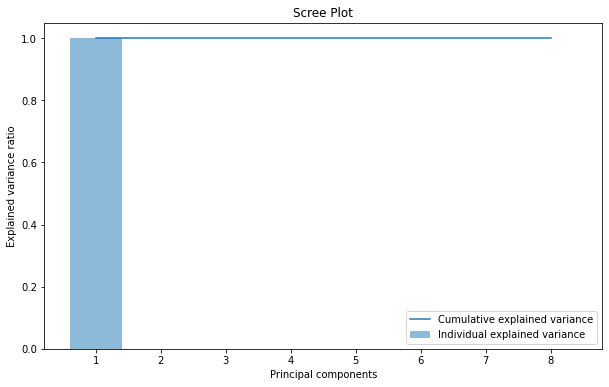

In [13]:
import matplotlib.pyplot as plt
import numpy as np

explained_variance_ratio = np.array(pc.pcaExplainedVarianceRatio(pca))

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot scree plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Scree Plot')
plt.legend()
plt.show()

In [14]:
pc = PCAClassifier()
pca = pc.pcaClassifier(x_train)
print("pcaClassifier Function Executed")
print("PCA Explained Variance Ratio: ",pc.pcaExplainedVarianceRatio(pca))
print("PCA Singular Values: ",pc.pcaSingularValues(pca))

pcaClassifier Function Executed
PCA Explained Variance Ratio:  [9.99933992e-01 5.50117328e-05 1.08865301e-05 4.10254401e-08
 7.16341970e-09 5.65712589e-09 5.15454119e-09 4.64849215e-09]
PCA Singular Values:  [5.13569256e+06 3.80926349e+04 1.69456445e+04 1.04025539e+03
 4.34683895e+02 3.86288050e+02 3.68729903e+02 3.50162313e+02]


In [15]:
# Train the PCA model
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=1)
df_train_pca = pca_final.fit_transform(x_train)

In [16]:
# Apply PCA model to the test data
df_test_pca = pca_final.transform(x_test)

In [17]:
# Train the Logistic Regression model
from sklearn.linear_model import LogisticRegression
LR_PCA_Learner = LogisticRegression()
LR_PCA_Model = LR_PCA_Learner.fit(df_train_pca, y_train)

In [18]:
# Calculate the Area Under the Curve (AUC)
pred_test = LR_PCA_Model.predict_proba(df_test_pca)

In [19]:

y_predict_test = LR_PCA_Model.predict(df_test_pca)

In [20]:
from sklearn.metrics import classification_report
reportspca = classification_report(y_test, y_predict_test)
print(reportspca)

              precision    recall  f1-score   support

           0       0.43      0.00      0.01     25269
           1       0.91      1.00      0.95    251759

    accuracy                           0.91    277028
   macro avg       0.67      0.50      0.48    277028
weighted avg       0.87      0.91      0.87    277028



## Feature selection

In [6]:
df = pd.read_parquet(full_path)
# # Filter columns that start with 'state_code'
# state_code_columns = df.filter(regex='^state_code', axis=1)
#ref state
df = df.drop(['derived_sex_Male','race_ethnicity_White', 'applicant_age_25-34', 'occupancy_type_Principal Residence'], axis=1)

# bring data with state code 
# filter by state_code of interst
# then get dummies for that state
# Drop filtered columns

# 'derived_sex_Male', 'race_ethnicity_White, 'applicant_age_25-34', occupancy_type_Principal Residence
df = df[df['state_code'] == 'NY']
#df = pd.get_dummies(df, columns=['state_code'], drop_first=True)



x_data = df.drop(['application_approved', 'county_code', 'state_code'], axis=1)
y_data = df['application_approved']

In [7]:
import statsmodels.api as sm
LR2 = sm.GLM(y_data,(sm.add_constant(x_data)), family = sm.families.Binomial())
LR_model2 = LR2.fit()
LR_model2.summary()

c:\Users\ForceNature\miniconda3\lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
c:\Users\ForceNature\miniconda3\lib\site-packages\statsmodels\genmod\families\family.py:1056: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
c:\Users\ForceNature\miniconda3\lib\site-packages\statsmodels\genmod\families\family.py:1056: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +


<class 'statsmodels.iolib.summary.Summary'>
"""
                  Generalized Linear Model Regression Results                   
================================================================================
Dep. Variable:     application_approved   No. Observations:               923426
Model:                              GLM   Df Residuals:                   923398
Model Family:                  Binomial   Df Model:                           27
Link Function:                    Logit   Scale:                          1.0000
Method:                            IRLS   Log-Likelihood:                    nan
Date:                  Wed, 10 Apr 2024   Deviance:                   6.1203e+05
Time:                          19:48:09   Pearson chi2:                 2.99e+19
No. Iterations:                     100   Pseudo R-squ. (CS):                nan
Covariance Type:              nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                             -2.995e+14   1.31e+06  -2.28e+08      0.000   -2.99e+14   -2.99e+14
loan_term                          2.423e+11   1635.246   1.48e+08      0.000    2.42e+11    2.42e+11
interest_rate                       1.08e+14   3274.842    3.3e+10      0.000    1.08e+14    1.08e+14
income_log                          1.08e+13   1.48e+05   7.28e+07      0.000    1.08e+13    1.08e+13
loan_amount_log                   -1.062e+13    2.7e+05  -3.93e+07      0.000   -1.06e+13   -1.06e+13
property_value_log                 1.292e+13   2.66e+05   4.86e+07      0.000    1.29e+13    1.29e+13
loan_to_value                      5.737e+13   1.92e+05   2.99e+08      0.000    5.74e+13    5.74e+13
debt_to_income                     4.378e+08     11.555   3.79e+07      0.000    4.38e+08    4.38e+08
race_ethnicity_African American    1.488e+13   3.02e+05   4.92e+07      0.000    1.49e+13    1.49e+13
race_ethnicity_Asian               6.044e+12   2.45e+05   2.47e+07      0.000    6.04e+12    6.04e+12
race_ethnicity_Hispanic or Latino -8.557e+12   2.69e+05  -3.18e+07      0.000   -8.56e+12   -8.56e+12
race_ethnicity_Joint              -1.449e+13   3.82e+05  -3.79e+07      0.000   -1.45e+13   -1.45e+13
race_ethnicity_Missing             5.567e+12   3.16e+05   1.76e+07      0.000    5.57e+12    5.57e+12
race_ethnicity_Native American    -3.897e+13   1.66e+06  -2.35e+07      0.000    -3.9e+13    -3.9e+13
race_ethnicity_Other              -3.369e+13   5.81e+05  -5.79e+07      0.000   -3.37e+13   -3.37e+13
race_ethnicity_Pacific Islander   -9.473e+13    2.1e+06  -4.52e+07      0.000   -9.47e+13   -9.47e+13
occupancy_type_Investment         -2.134e+12   3.28e+05   -6.5e+06      0.000   -2.13e+12   -2.13e+12
occupancy_type_Second Residence    -2.39e+13   3.71e+05  -6.44e+07      0.000   -2.39e+13   -2.39e+13
derived_sex_Female                 6.163e+12   1.91e+05   3.22e+07      0.000    6.16e+12    6.16e+12
derived_sex_Joint                  2.314e+13   1.75e+05   1.32e+08      0.000    2.31e+13    2.31e+13
derived_sex_Missing                2.299e+13   4.01e+05   5.73e+07      0.000     2.3e+13     2.3e+13
applicant_age_-99                   2.72e+15   4.09e+05   6.64e+09      0.000    2.72e+15    2.72e+15
applicant_age_35-44               -5.977e+12   1.81e+05  -3.29e+07      0.000   -5.98e+12   -5.98e+12
applicant_age_45-54               -1.961e+13   2.14e+05  -9.17e+07      0.000   -1.96e+13   -1.96e+13
applicant_age_55-64               -3.605e+13    2.6e+05  -1.39e+08      0.000    -3.6e+13    -3.6e+13
applicant_age_65-74                -5.12e+13   3.84e+05  -1.33e+08      0.000   -5.12e+13   -5.12e+13
applicant_age_<25                 -2.107e+13   3.72e+05  -5.66e+07      0.000   -2.11e+13   -2.11e+13
a